In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from y_engineering import *
from Indicators import *
import matplotlib.pyplot as plt
from sklearn.metrics import *
from tensorflow.keras import layers, Model
from tensorflow import keras

2023-03-11 21:47:37.596085: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-11 21:47:37.596103: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
df = pd.read_csv("appl_clean_train.csv")

In [3]:
df['y_binary_sma5'] = (sma(df, period=5, column='Adj Close').shift(periods=-5) > df['Adj Close']).astype(int)

In [4]:
ema(df, period=21, column='Adj Close', inplace=True)
ema(df, period=200, column='Adj Close', inplace=True)

0        0.789849
1        0.799873
2        0.820963
3        0.827290
4        0.823237
          ...    
4996    52.204988
4997    52.328630
4998    52.459681
4999    52.587992
5000    52.707507
Name: Adj Close, Length: 5001, dtype: float64

In [5]:
df["ema_pct_21"] = pct_log(df, y_col='ema_21', time_to_pred = 1, pct=True, log=False)
df["ema_pct_200"] = pct_log(df, y_col='ema_200', time_to_pred = 1, pct=True, log=False)

In [6]:
df

,Adj Close,Volume,pct_log,pct,y_binary_sma5,ema_21,ema_200,ema_pct_21,ema_pct_200
0,0.789849,459177600,NaN,NaN,1,0.789849,0.789849,NaN,NaN
1,0.809797,597643200,-0.105724,0.025255,1,0.800298,0.799873,0.013229,0.012691
2,0.862517,1831132800,-0.298956,0.065103,0,0.823043,0.820963,0.028420,0.026367
3,0.845894,495924800,0.131580,-0.019273,0,0.829596,0.827290,0.007963,0.007706
4,0.807423,440876800,0.278119,-0.045480,1,0.824279,0.823237,-0.006410,-0.004899
...,...,...,...,...,...,...,...,...,...
4996,65.139717,84020400,0.004179,0.017534,0,63.019752,52.204988,0.003375,0.002496
4997,64.631065,105207600,-0.001877,-0.007809,0,63.166235,52.328630,0.002324,0.002368
4998,65.499199,65235600,0.003201,0.013432,0,63.378322,52.459681,0.003358,0.002504
4999,65.354912,46617600,-0.000527,-0.002203,0,63.558012,52.587992,0.002835,0.002446


(array([ 12.,  18.,  10.,  18.,   9.,  22.,  17.,  22.,  23.,  31.,  23.,
         35.,  27.,  53.,  41.,  36.,  47.,  62.,  78.,  90., 142., 166.,
        231., 373., 574., 572., 444., 295., 201., 148., 109.,  95.,  60.,
         49.,  62.,  49.,  45.,  45.,  30.,  26.,  34.,  18.,  15.,  19.,
         13.,  17.,   9.,   9.,   9.,   9.]),
 array([-0.05 , -0.048, -0.046, -0.044, -0.042, -0.04 , -0.038, -0.036,
        -0.034, -0.032, -0.03 , -0.028, -0.026, -0.024, -0.022, -0.02 ,
        -0.018, -0.016, -0.014, -0.012, -0.01 , -0.008, -0.006, -0.004,
        -0.002,  0.   ,  0.002,  0.004,  0.006,  0.008,  0.01 ,  0.012,
         0.014,  0.016,  0.018,  0.02 ,  0.022,  0.024,  0.026,  0.028,
         0.03 ,  0.032,  0.034,  0.036,  0.038,  0.04 ,  0.042,  0.044,
         0.046,  0.048,  0.05 ]),
 <BarContainer object of 50 artists>)

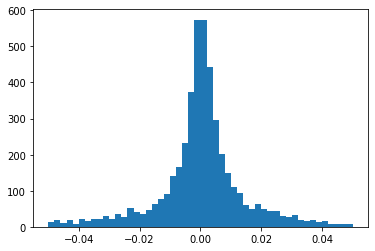

In [131]:
plt.hist(df['pct_log'], bins=50, range=(-0.05,0.05))

(array([  7.,  15.,  20.,  25.,  32.,  29.,  28.,  29.,  22.,  40.,  43.,
         62.,  73.,  84.,  78., 100.,  95., 109., 110., 160., 154., 213.,
        236., 251., 247., 269., 233., 223., 224., 174., 181., 162., 151.,
        124., 125.,  74.,  66.,  57.,  69.,  54.,  46.,  32.,  35.,  33.,
         41.,  28.,  19.,  23.,  24.,  18.]),
 array([-0.05 , -0.048, -0.046, -0.044, -0.042, -0.04 , -0.038, -0.036,
        -0.034, -0.032, -0.03 , -0.028, -0.026, -0.024, -0.022, -0.02 ,
        -0.018, -0.016, -0.014, -0.012, -0.01 , -0.008, -0.006, -0.004,
        -0.002,  0.   ,  0.002,  0.004,  0.006,  0.008,  0.01 ,  0.012,
         0.014,  0.016,  0.018,  0.02 ,  0.022,  0.024,  0.026,  0.028,
         0.03 ,  0.032,  0.034,  0.036,  0.038,  0.04 ,  0.042,  0.044,
         0.046,  0.048,  0.05 ]),
 <BarContainer object of 50 artists>)

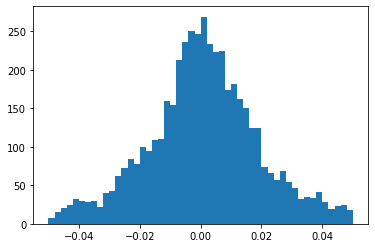

In [8]:
plt.hist(df['pct'], bins=50, range=(-0.05,0.05))

In [14]:
def get_ordered_index(df, period_to_skip=31, val_split_ratio=0.2, period_from_end_skip=0):
    # get ordered dates split into train, val based on index
    all_dates = list(df.index)
    train = int(len(all_dates)*(1-val_split_ratio))

    train_dates = all_dates[period_to_skip:train]
    val_dates = all_dates[train:]
    return train_dates, val_dates

In [15]:
def get_x(df, y_index, x_col = 'pct', period=3):
    return df.loc[y_index-period:y_index-1, x_col]

In [23]:
def get_xy(df, period, x_col = ['pct'], y_col='pct', val_split_ratio=0.2):
    # get training and val data
    
    train_i, val_i = get_ordered_index(df, period_to_skip=period+1, val_split_ratio=0.2)

    y_train = np.array(df.loc[train_i, y_col])
    y_val = np.array(df.loc[val_i, y_col])
    
    x_train = np.zeros((len(train_i),period, len(x_col)))
    x_val = np.zeros((len(val_i),period, len(x_col)))
    
    for j in range(len(x_col)):
        x_column = x_col[j]

        for i in range(len(train_i)):
            temp = np.array(get_x(df, train_i[i], x_col = x_column, period=period))
            x_train[i, :, j] = temp

        for i in range(len(val_i)):
            temp = np.array(get_x(df, val_i[i], x_col = x_column, period=period))
            x_val[i, :, j] = temp

    # return np.squeeze(x_train), y_train, np.squeeze(x_val), y_val
    return x_train, y_train, x_val, y_val

In [28]:
period =14
pred_column = "y_binary_sma5"
ema_columns = ["ema_21", "ema_200"]

x_train_daily, y_train, x_val_daily, y_val = get_xy(df, period, y_col=pred_column)
x_train_ema, y_train_ema, x_val_ema, y_val_ema = get_xy(df, period, x_col = ema_columns, y_col=pred_column)
input_shape = [(x_train_daily.shape), (x_train_ema.shape)]

In [29]:
x_train_daily.shape, y_train.shape, x_val_daily.shape, y_val.shape, x_train_ema.shape, x_val_ema.shape,

((3985, 14, 1), (3985,), (1001, 14, 1), (1001,), (3985, 14, 2), (1001, 14, 2))

In [47]:
def indicator_cnn_binary(input_shape):
        
    daily_inputs = keras.Input(input_shape[0][1:], name="daily_input")
    ind_inputs = keras.Input(input_shape[1][1:], name="ind_input")
    
    # daily = layers.Conv1D(16, kernel_size=5, strides=3, activation='relu')(inputs)
    daily = layers.Conv1D(8, kernel_size=3, strides=1, activation='relu')(daily_inputs)
    daily = layers.Conv1D(1, kernel_size=1, strides=1, activation='relu')(daily)
    # daily = layers.LSTM(16, return_sequences=True, return_state=True)(daily)
    daily = layers.LSTM(16, return_sequences=False, return_state=False)(daily)
    daily = keras.Model(inputs=daily_inputs, outputs= daily)
    
    indicators = layers.Conv1D(8, kernel_size=3, strides=1, activation='relu')(ind_inputs)
    indicators = layers.Conv1D(1, kernel_size=1, strides=1, activation='relu')(indicators)
    indicators = layers.Flatten()(indicators)
    indicators = keras.Model(inputs=ind_inputs, outputs= indicators)
    
    combined = layers.concatenate([daily.output, indicators.output])
#     output = layers.Dropout(0.3)(combined)
    output = layers.Dense(32, activation="relu", activity_regularizer=None)(combined)
#     output = layers.Dropout(0.3)(output)
    output = layers.Dense(16, activation="relu", activity_regularizer=None)(output)
    # output = layers.Dropout(0.2)(output)
    output = layers.Dense(1, activation="linear")(output)
    model = keras.Model(
        inputs=[daily.input, indicators.input],
        outputs=output)    
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
            loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
            metrics=[tf.keras.metrics.binary_accuracy])
    
    return model

In [48]:
input_shape

[(3985, 14, 1), (3985, 14, 2)]

In [49]:
model = indicator_cnn_binary(input_shape)
keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)
model.summary()

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 daily_input (InputLayer)       [(None, 14, 1)]      0           []                               
                                                                                                  
 ind_input (InputLayer)         [(None, 14, 2)]      0           []                               
                                                                                                  
 conv1d_22 (Conv1D)             (None, 12, 8)        32          ['daily_input[0][0]']            
                                                                                                  
 conv1d_24 (Conv1D)         

In [87]:
history = model.fit(x=[x_train_daily, x_train_ema], y=y_train, batch_size=254, epochs=150, validation_split=0.2)
test_scores = model.evaluate(x=[x_val_daily, x_val_ema], y=y_val, verbose=2)

Epoch 1/150
13/13 [==============================] - 0s 10ms/step - loss: 0.6268 - binary_accuracy: 0.5903 - val_loss: 0.7641 - val_binary_accuracy: 0.5257
Epoch 2/150
13/13 [==============================] - 0s 9ms/step - loss: 0.6297 - binary_accuracy: 0.5960 - val_loss: 0.7535 - val_binary_accuracy: 0.5207
Epoch 3/150
13/13 [==============================] - 0s 8ms/step - loss: 0.6284 - binary_accuracy: 0.6019 - val_loss: 0.7524 - val_binary_accuracy: 0.5232
Epoch 4/150
13/13 [==============================] - 0s 8ms/step - loss: 0.6353 - binary_accuracy: 0.5947 - val_loss: 0.7351 - val_binary_accuracy: 0.5182
Epoch 5/150
13/13 [==============================] - 0s 9ms/step - loss: 0.6307 - binary_accuracy: 0.5982 - val_loss: 0.7469 - val_binary_accuracy: 0.5107
Epoch 6/150
13/13 [==============================] - 0s 9ms/step - loss: 0.6269 - binary_accuracy: 0.6060 - val_loss: 0.7327 - val_binary_accuracy: 0.5332
Epoch 7/150
13/13 [==============================] - 0s 8ms/step - lo

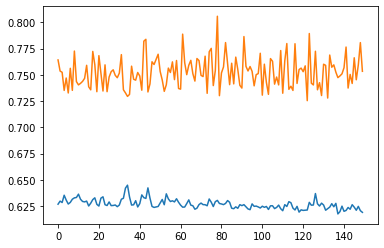

In [88]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [89]:
test_scores

[0.7960314154624939, 0.5224775075912476]

In [90]:
y_pred = model.predict(x=[x_val_daily, x_val_ema])

In [91]:
from sklearn.metrics import confusion_matrix
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [92]:
def threshhold(x, thresh):
    return (x > thresh).astype(int)

In [93]:
y_pred_sigmoid = sigmoid(y_pred)
y_pred_binary = threshhold(y_pred_sigmoid, 0.5)

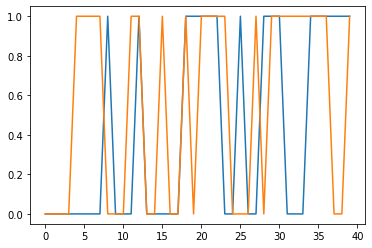

In [94]:
plt.plot(y_pred_binary[20:60])
plt.plot(y_val[20:60])

(array([  6.,   7.,  22.,  90., 165., 144., 156., 136., 123., 152.]),
 array([0.02599617, 0.12302889, 0.22006162, 0.31709433, 0.41412705,
        0.5111598 , 0.6081925 , 0.70522517, 0.8022579 , 0.8992906 ,
        0.99632335], dtype=float32),
 <BarContainer object of 10 artists>)

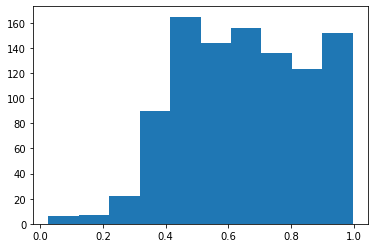

In [95]:
plt.hist(y_pred_sigmoid)

In [99]:
y_pred_binary = threshhold(y_pred_sigmoid, 0.51).reshape(1001,)

In [100]:
def show_cf(y_val, y_pred_binary):
    cf = confusion_matrix(y_val, y_pred_binary, labels = [0,1], normalize='true')
    ConfusionMatrixDisplay(cf).plot()
    plt.show()
    print(classification_report(y_val, y_pred_binary))

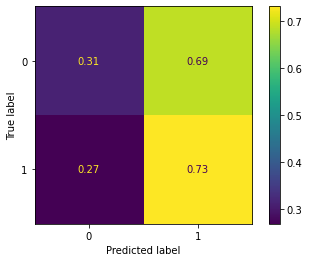

              precision    recall  f1-score   support

           0       0.44      0.31      0.37       405
           1       0.61      0.73      0.67       596

    accuracy                           0.56      1001
   macro avg       0.53      0.52      0.52      1001
weighted avg       0.54      0.56      0.54      1001



In [101]:
show_cf(y_val, y_pred_binary)

In [126]:
thresholds = [0.45 + 0.01*i for i in range(20)]
precision = []
recall = []
f1_score = []
accuracy = []
for i in thresholds:
    y_pred_binary = threshhold(y_pred_sigmoid, i).reshape(1001,)
    cr = classification_report(y_val, y_pred_binary, output_dict=True)
    precision.append(cr['1']['precision'])
    recall.append(cr['1']['recall'])
    f1_score.append(cr['1']['f1-score'])
    accuracy.append(cr['accuracy'])

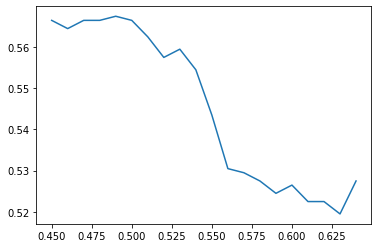

In [129]:
plt.plot(thresholds, accuracy)

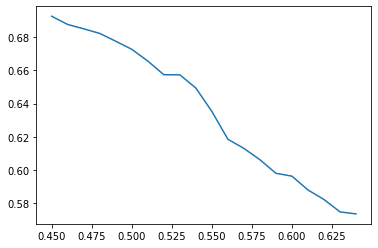

In [130]:
plt.plot(thresholds, f1_score)

In [113]:
cr = classification_report(y_val, y_pred_binary, output_dict=True)
print(cr.keys())

dict_keys(['0', '1', 'accuracy', 'macro avg', 'weighted avg'])


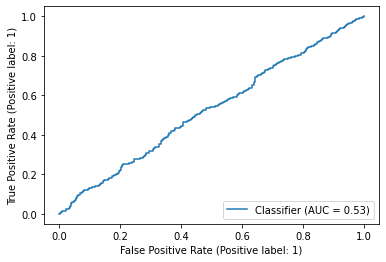

In [102]:
RocCurveDisplay.from_predictions(y_val, y_pred_sigmoid)

In [116]:
period =5 
x_train, y_train, x_val, y_val = get_xy(df, period)

In [93]:
def basic_cnn_lstm(period):
    
    inputs = tf.keras.Input(shape=(period,1,))
    
    # x = layers.Conv1D(16, kernel_size=5, strides=3, activation='relu')(inputs)
    x = layers.Conv1D(8, kernel_size=3, strides=1, activation='relu')(inputs)
    x = layers.Conv1D(1, kernel_size=1, strides=1, activation='relu')(x)
    
    # x = layers.LSTM(16, return_sequences=True, return_state=True)(x)
    x = layers.LSTM(16, return_sequences=False, return_state=False)(x)
    
    
    x = tf.keras.layers.Dense(32)(x)
    x = tf.keras.layers.Dense(8)(x)
    outputs = tf.keras.layers.Dense(1)(x)
    
    model = keras.Model(inputs, outputs) 
    
    model.compile(loss = 'mse', 
                    optimizer = "adam",               
                    metrics = ['mae'])
    
    return model

In [94]:
model = basic_cnn_lstm(period)
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 5, 1)]            0         
                                                                 
 conv1d_27 (Conv1D)          (None, 3, 8)              32        
                                                                 
 conv1d_28 (Conv1D)          (None, 3, 1)              9         
                                                                 
 lstm_14 (LSTM)              (None, 16)                1152      
                                                                 
 dense_15 (Dense)            (None, 32)                544       
                                                                 
 dense_16 (Dense)            (None, 8)                 264       
                                                                 
 dense_17 (Dense)            (None, 1)                 9   

In [95]:
history = model.fit(x_train, y_train, batch_size=254, epochs=20, validation_split=0.2)
test_scores = model.evaluate(x_val, y_val, verbose=2)

Epoch 1/20
13/13 [==============================] - 1s 25ms/step - loss: 8.9533e-04 - mae: 0.0209 - val_loss: 2.8276e-04 - val_mae: 0.0121
Epoch 2/20
13/13 [==============================] - 0s 5ms/step - loss: 8.6059e-04 - mae: 0.0202 - val_loss: 2.8326e-04 - val_mae: 0.0120
Epoch 3/20
13/13 [==============================] - 0s 4ms/step - loss: 8.5716e-04 - mae: 0.0201 - val_loss: 2.8502e-04 - val_mae: 0.0121
Epoch 4/20
13/13 [==============================] - 0s 4ms/step - loss: 8.5904e-04 - mae: 0.0202 - val_loss: 2.8394e-04 - val_mae: 0.0121
Epoch 5/20
13/13 [==============================] - 0s 5ms/step - loss: 8.5688e-04 - mae: 0.0201 - val_loss: 2.8472e-04 - val_mae: 0.0121
Epoch 6/20
13/13 [==============================] - 0s 4ms/step - loss: 8.5466e-04 - mae: 0.0201 - val_loss: 2.8598e-04 - val_mae: 0.0121
Epoch 7/20
13/13 [==============================] - 0s 4ms/step - loss: 8.6213e-04 - mae: 0.0203 - val_loss: 2.8518e-04 - val_mae: 0.0121
Epoch 8/20
13/13 [===============

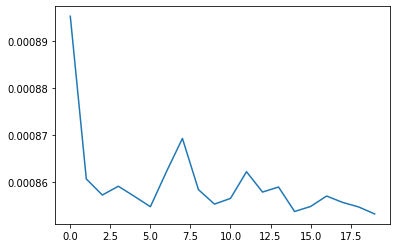

In [96]:
plt.plot(history.history['loss'])

In [103]:
history.history['mae'][-1]

0.020092910155653954

In [97]:
x_pred = model.predict(x_val)

In [98]:
x_pred

array([[0.00441085],
       [0.00422285],
       [0.00434896],
       ...,
       [0.00362943],
       [0.00359191],
       [0.00370103]], dtype=float32)

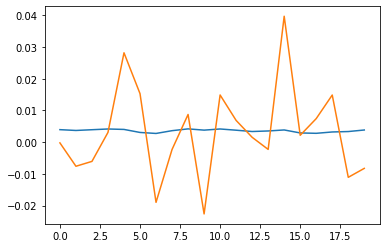

In [99]:
plt.plot(x_pred[40:60])
plt.plot(y_val[40:60])

(array([  5.,  14.,  52.,  82., 251., 360., 171.,  43.,  14.,   9.]),
 array([0.0019242 , 0.00228462, 0.00264504, 0.00300546, 0.00336588,
        0.0037263 , 0.00408672, 0.00444714, 0.00480755, 0.00516797,
        0.00552839], dtype=float32),
 <BarContainer object of 10 artists>)

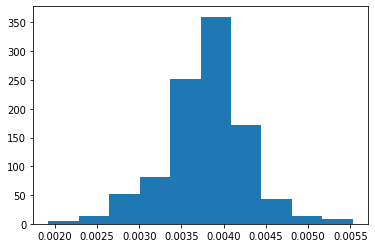

In [102]:
plt.hist(x_pred)